# 1. Introduction

#### 1-1 Generating a collapsed one-hot using sklearn

In [37]:
#!pip install scikit-learn
#!pip install torch torchvision

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

In [2]:
corpus = ['Time flies like an arrow', 'Fruit flies like a banana'] # Agregar nuestro corpus

In [21]:
one_hot_vectorizer = CountVectorizer(binary=True)
one_hot = one_hot_vectorizer.fit_transform(corpus).toarray()

<AxesSubplot:>

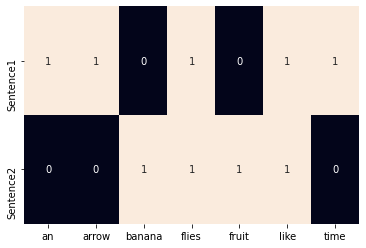

In [31]:
sns.heatmap(one_hot, annot=True, cbar=False, xticklabels=one_hot_vectorizer.get_feature_names(), 
            yticklabels=['Sentence1','Sentence2']) 

#### 1-2 Generating a TF-IDF representation using sklearn

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [33]:
tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(corpus).toarray()

<AxesSubplot:>

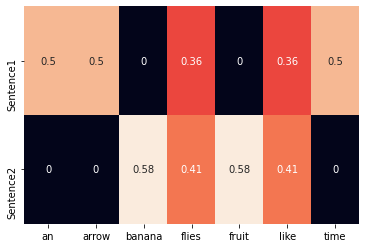

In [34]:
sns.heatmap(tfidf, annot=True, cbar=False, xticklabels=tfidf_vectorizer.get_feature_names(), 
            yticklabels=['Sentence1','Sentence2']) 

In [38]:
import torch
import numpy as np

torch.cuda.is_available()

/home/juanyjulia/.local/lib/python3.6/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


False

In [39]:
!nvcc --version

/bin/bash: nvcc: command not found


In [40]:
!nvidia-smi

/bin/bash: nvidia-smi: command not found


In [41]:
def describe(x):
  print('Type: {}'.format(x.type()))
  print('Shape/size: {}'.format(x.shape))
  print('Values: \n{}'.format(x))

In [42]:
describe(torch.Tensor(2,3))

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[       nan, 0.0000e+00, 4.4721e+21],
        [3.9891e+24, 4.1996e+12, 7.5338e+28]])


In [43]:
describe(torch.rand(2,3))

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[0.0066, 0.7600, 0.0237],
        [0.8808, 0.3587, 0.3681]])


In [44]:
describe(torch.randn(2,3))

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[-0.1052,  0.1523,  0.1430],
        [-0.3474, -1.3172,  0.3193]])


In [45]:
describe(torch.zeros(2,3))

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [46]:
x= torch.ones(2,3)
describe(x)

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [47]:
x.fill_(5)
describe(x)

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[5., 5., 5.],
        [5., 5., 5.]])


In [48]:
f = torch.Tensor([[1,2,3],[4,5,6]])
describe(f)

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [49]:
npy = np.random.rand(2,3)
describe(torch.from_numpy(npy))

Type: torch.DoubleTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[0.2730, 0.8238, 0.0977],
        [0.2544, 0.4135, 0.7195]], dtype=torch.float64)


In [51]:
x = torch.FloatTensor([[1,2,3],[4,5,6]])
describe(x)

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [53]:
x = x.long()
describe(x)

Type: torch.LongTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[1, 2, 3],
        [4, 5, 6]])


In [56]:
x = torch.tensor([[1,2,3],[4,5,6]], dtype=torch.int64)
describe(x)

Type: torch.LongTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[1, 2, 3],
        [4, 5, 6]])


In [57]:
x = x.float()
describe(x)

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[1., 2., 3.],
        [4., 5., 6.]])


#### Tensor operations: addition

In [72]:
x = torch.randn(2,3)
describe(x)

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[-0.6786, -1.2897,  1.4366],
        [-0.8339,  0.0277,  0.1960]])


In [73]:
describe(torch.add(x,x))

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[-1.3572, -2.5795,  2.8731],
        [-1.6679,  0.0554,  0.3920]])


In [74]:
describe(x+x)

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[-1.3572, -2.5795,  2.8731],
        [-1.6679,  0.0554,  0.3920]])


#### Dimension-based tensor operations

In [79]:
x = torch.arange(6)
describe(x)

Type: torch.LongTensor
Shape/size: torch.Size([6])
Values: 
tensor([0, 1, 2, 3, 4, 5])


In [80]:
x = x.view(2,3)
describe(x)

Type: torch.LongTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[0, 1, 2],
        [3, 4, 5]])


In [81]:
describe(torch.sum(x, dim=0))

Type: torch.LongTensor
Shape/size: torch.Size([3])
Values: 
tensor([3, 5, 7])


In [82]:
describe(torch.sum(x, dim=1))

Type: torch.LongTensor
Shape/size: torch.Size([2])
Values: 
tensor([ 3, 12])


In [83]:
describe(torch.transpose(x,0,1))

Type: torch.LongTensor
Shape/size: torch.Size([3, 2])
Values: 
tensor([[0, 3],
        [1, 4],
        [2, 5]])


#### Slicing and indexing a tensor

In [84]:
describe(x)

Type: torch.LongTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[0, 1, 2],
        [3, 4, 5]])


In [85]:
describe(x[:1,:2])

Type: torch.LongTensor
Shape/size: torch.Size([1, 2])
Values: 
tensor([[0, 1]])


In [86]:
describe(x[0,1])

Type: torch.LongTensor
Shape/size: torch.Size([])
Values: 
1


#### Complex indexing: noncontiguous indexing of a tensor

In [87]:
indices = torch.LongTensor([0,2])
describe(torch.index_select(x, dim=1, index=indices))

Type: torch.LongTensor
Shape/size: torch.Size([2, 2])
Values: 
tensor([[0, 2],
        [3, 5]])


In [88]:
indices = torch.LongTensor([0,0])
describe(torch.index_select(x, dim=0, index=indices))

Type: torch.LongTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[0, 1, 2],
        [0, 1, 2]])


In [90]:
row_indices = torch.arange(2).long()
col_indices = torch.LongTensor([0,1])
describe(x[row_indices, col_indices])


Type: torch.LongTensor
Shape/size: torch.Size([2])
Values: 
tensor([0, 4])


#### Concatenating tensors

In [91]:
x = torch.arange(6).view(2,3)
describe(x)

Type: torch.LongTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[0, 1, 2],
        [3, 4, 5]])


In [92]:
describe(torch.cat([x,x], dim=0))

Type: torch.LongTensor
Shape/size: torch.Size([4, 3])
Values: 
tensor([[0, 1, 2],
        [3, 4, 5],
        [0, 1, 2],
        [3, 4, 5]])


In [95]:
describe(torch.cat([x,x], dim=1))

Type: torch.LongTensor
Shape/size: torch.Size([2, 6])
Values: 
tensor([[0, 1, 2, 0, 1, 2],
        [3, 4, 5, 3, 4, 5]])


In [97]:
describe(torch.stack([x,x]))

Type: torch.LongTensor
Shape/size: torch.Size([2, 2, 3])
Values: 
tensor([[[0, 1, 2],
         [3, 4, 5]],

        [[0, 1, 2],
         [3, 4, 5]]])


#### Linear algebra on tensors: multiplication

In [98]:
x1 = torch.arange(6).view(2,3)
describe(x1)

Type: torch.LongTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[0, 1, 2],
        [3, 4, 5]])


In [101]:
x2 = torch.ones(3,2)
x2[:,1] += 1
describe(x2)

Type: torch.FloatTensor
Shape/size: torch.Size([3, 2])
Values: 
tensor([[1., 2.],
        [1., 2.],
        [1., 2.]])


In [102]:
describe(torch.mm(x1,x2))

RuntimeError: expected scalar type Long but found Float

#### Creating tensors for gradient bookkeeping

In [106]:
x = torch.ones(2,2,requires_grad=True)
describe(x)
print(x.grad is None)

Type: torch.FloatTensor
Shape/size: torch.Size([2, 2])
Values: 
tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
True


In [111]:
y = (x+2) * (x+5) + 3
describe(y)
print(x.grad is None)

Type: torch.FloatTensor
Shape/size: torch.Size([2, 2])
Values: 
tensor([[21., 21.],
        [21., 21.]], grad_fn=<AddBackward0>)
True


In [112]:
z = y.mean()
describe(z)
z.backward()
print(x.grad is None)

Type: torch.FloatTensor
Shape/size: torch.Size([])
Values: 
21.0
False


#### CUDA

In [113]:
torch.cuda.is_available()

False

In [115]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [116]:
x = torch.rand(3,3).to(device)
describe(x)

Type: torch.FloatTensor
Shape/size: torch.Size([3, 3])
Values: 
tensor([[0.3664, 0.8633, 0.1748],
        [0.4512, 0.3929, 0.2136],
        [0.9074, 0.1499, 0.8293]])


#### Mixing CUDA tensors with CPU-bound tensors

In [118]:
y = torch.rand(3,3)
x+y

tensor([[0.6413, 1.5112, 0.2189],
        [0.8758, 0.6915, 1.1145],
        [1.0696, 0.5064, 1.2356]])

In [119]:
cpu_device = torch.device('cpu')
y = y.to(cpu_device)
x = x.to(cpu_device)
y+x

tensor([[0.6413, 1.5112, 0.2189],
        [0.8758, 0.6915, 1.1145],
        [1.0696, 0.5064, 1.2356]])

In [120]:
#!CUDA_VISIBLE_DEVISES = 0,1,2,3 python main.py # when having more than 1 device

### Exercises

In [143]:
#1
x = torch.rand(3, 3)
describe(x)

Type: torch.FloatTensor
Shape/size: torch.Size([3, 3])
Values: 
tensor([[0.0980, 0.6075, 0.9182],
        [0.6232, 0.9949, 0.7767],
        [0.8956, 0.5483, 0.3190]])


In [146]:
x = x.unsqueeze(0)
describe(x)

Type: torch.FloatTensor
Shape/size: torch.Size([1, 3, 3])
Values: 
tensor([[[0.0980, 0.6075, 0.9182],
         [0.6232, 0.9949, 0.7767],
         [0.8956, 0.5483, 0.3190]]])


In [151]:
#2
x = x.squeeze()
describe(x)

Type: torch.FloatTensor
Shape/size: torch.Size([3, 3])
Values: 
tensor([[0.0980, 0.6075, 0.9182],
        [0.6232, 0.9949, 0.7767],
        [0.8956, 0.5483, 0.3190]])


In [155]:
#3
x = torch.rand(5,3) * (7-3)
describe(x)

Type: torch.FloatTensor
Shape/size: torch.Size([5, 3])
Values: 
tensor([[1.2061, 1.1581, 1.1729],
        [2.6614, 1.7662, 3.6537],
        [1.4991, 2.1831, 0.8410],
        [3.2915, 1.8782, 2.7488],
        [0.2767, 3.7729, 0.5642]])


In [158]:
#4 
x = torch.FloatTensor(5, 3).normal_(mean=0, std=1)
describe(x)

Type: torch.FloatTensor
Shape/size: torch.Size([5, 3])
Values: 
tensor([[-1.1457,  1.3319, -0.0079],
        [ 1.1760, -1.9318,  0.3984],
        [-0.5396, -0.2497, -1.4247],
        [ 0.5303, -2.6896,  1.6340],
        [-0.0476, -0.7756,  0.8839]])


In [161]:
#5 retrieve indices with non zeros
x = torch.FloatTensor([1,1,1,0,1])
describe(torch.nonzero(x))

Type: torch.LongTensor
Shape/size: torch.Size([4, 1])
Values: 
tensor([[0],
        [1],
        [2],
        [4]])


In [165]:
#6
x = torch.rand(3,1)
#x = torch.stack([x,x,x,x])
x = x.expand(3,4)
describe(x)

Type: torch.FloatTensor
Shape/size: torch.Size([3, 4])
Values: 
tensor([[0.8405, 0.8405, 0.8405, 0.8405],
        [0.8826, 0.8826, 0.8826, 0.8826],
        [0.7106, 0.7106, 0.7106, 0.7106]])


In [166]:
#7
x = torch.rand(3,4,5)
y = torch.rand(3,5,4)
torch.bmm(x,y)

tensor([[[1.4436, 0.4761, 1.4743, 1.0348],
         [1.3598, 0.5836, 1.2685, 0.8994],
         [1.3168, 0.5394, 1.3676, 0.6816],
         [1.9586, 0.6969, 2.1599, 1.6293]],

        [[1.2902, 1.4962, 1.3867, 0.6354],
         [1.6704, 1.9624, 2.2434, 0.8276],
         [1.3919, 1.7662, 1.8579, 0.6471],
         [0.8305, 1.0636, 1.3059, 0.3909]],

        [[1.3531, 0.3309, 0.6355, 1.2979],
         [1.4166, 0.7715, 0.8052, 1.4996],
         [0.8672, 0.4598, 0.6253, 1.0442],
         [1.8251, 1.2087, 0.9371, 1.7986]]])

In [169]:
x = torch.rand(3,4,5)
y = torch.rand(5,4)
torch.bmm(x,y.unsqueeze(0).expand(x.size(0),*y.size()))

tensor([[[1.1971, 0.4316, 0.9044, 0.8361],
         [1.1153, 1.6361, 1.7065, 1.1482],
         [1.1873, 1.4941, 1.8262, 1.0986],
         [1.9898, 1.5421, 2.0048, 1.7524]],

        [[1.2155, 1.2775, 1.8795, 1.2457],
         [0.9069, 0.9751, 1.2490, 0.8389],
         [1.2738, 1.4649, 1.2820, 1.1706],
         [1.4777, 1.2811, 1.4052, 1.1581]],

        [[1.3154, 0.8557, 0.9292, 0.7773],
         [1.2749, 1.0690, 1.1639, 0.8915],
         [1.2680, 0.7430, 0.9989, 1.1732],
         [1.4828, 1.3777, 1.6417, 1.2562]]])